In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## Regresión lineal

Un modelo lineal hace una predicción simplemente calculando una **suma ponderada de las variables de entrada, más una constante llamada término de sesgo** (también llamada intersección), y se puede expresar con la siguiente ecuación: 

$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$

donde: 
* $\hat{y}$ es el valor predecido
* $n$ es el número de variables
* $x_{i}$ es el valor en la variable ${i}$ésima
* $\theta_{j}$ es el $j$ésimo coeficiente del modelo (incluyendo el término de sesgo $\theta_{0}$ y los coeficientes $\theta_{1},\theta_{2}...\theta{n}$)  


Esto se puede escribir de manera mucho más concisa usando una forma vectorizada, que se puede expresar con la siguiente ecuación:

$\hat{y}=h_{\theta}(x)=\theta*x$

donde:
* $\theta$ es el vector de coeficientes del modelo (incluyendo el término de sesgo $\theta_{0}$ y los coeficientes $\theta_{1},\theta_{2}...\theta{n}$)
* $x$ es el vector de valores (incluyendo $x_{0}$ a $x_{n}$, en donde $x_{0}$ es siempre igual a 1) 
* $\theta*x$ es el producto punto de los vectores $\theta$ y $x$ (igual a $\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$)
* $h_{\theta}$ es la función hipotética del modelo que utiliza los coeficientes $\theta$

En Machine Learning, los vectores a menudo se representan como vectores de columna, que son matrices 2D con una sola columna. Si $\theta$ y $x$ son vectores columna, entonces la predicción es: $\hat{y}=\theta^{T}x$, donde $\theta^{T}$ es el la transposición de $\theta$ (un vector fila en lugar de un vector columna) y $\theta^{T}x$ es la multiplicación matricial de $\theta^{T}$ y $x$. Por supuesto, es la misma predicción, excepto que ahora se representa como una matriz de una sola celda en lugar de un valor escalar.

**Entrenar un modelo significa determinar sus coeficientes para que el modelo se ajuste mejor al conjunto de datos de entrenamiento.** Para este propósito, primero necesitamos una medida de qué tan bien (o mal) se ajusta el modelo a los datos de entrenamiento, es decir, una función de costo. **La medida de rendimiento más común de un modelo de regresión es el error cuadrático medio (ECM).** Por lo tanto, para entrenar un modelo de regresión lineal, debemos encontrar los valores de θ que minimizan el ECM, que se puede expresar con la siguiente ecuación:

$MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)}-y^{(i)})^2$

Para encontrar el valor de $\theta$ que minimiza la función de costo, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. Esto se llama la **ecuación normal**, que se puede expresar con la siguiente ecuación:

$\hat\theta=(X^TX)^{-1}X^Ty$

donde:
* $\hat\theta$ es el vector de coeficientes del modelo que minimizan la función de costo
* $y$ es el vector de los valores de la variable dependiente (incluyendo $y^{(1)}$ a $y^{(m)}$)


In [ ]:
# Define variables dependientes
X = 2 * np.random.rand(100, 1)

# Define variables independientes (y = 4 + 3x_1 + ruído gauseano)
y = 4 + 3 * X + np.random.randn(100, 1)

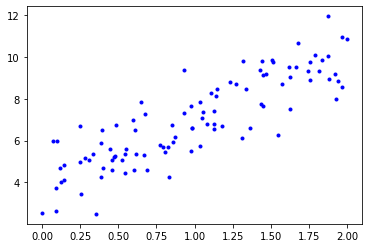

In [ ]:
# Grafica X y y
plt.plot(X, y, "b.")

In [ ]:
# Agregamos x_0 = 1 a cada observación
X_b = np.c_[np.ones((100, 1)), X]

# Ecuación normal
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.86405831],
       [3.13727315]])

Habríamos esperado que $\theta_0=4$ y $\theta_1=3$. No obstante, los coeficientes ajustados son los suficientemente cerca, pero el ruído gauseano hace imposible recuperar los coeficientes exactos de la función original.

Ahora, es posible hacer predicciones utilizando $\hat\theta$.

In [ ]:
# Predice valores de variable dependiente
y_predict = X_b.dot(theta_best)

En estadística, el coeficiente de determinación, denominado $R^2$, determina la calidad de un modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo, y se puede expresar con la siguiente ecuacuón:


$R^2=\frac{\sigma^2_{xy}}{\sigma^2_{x}\sigma^2_{y}}$

en donde: 
* $\sigma_{xy}$ es la covarianza de $(X,Y)$
* $\sigma^2_{x}$ es la varianza de la variable $X$
* $\sigma^2_{y}$ es la varianza de la variable $Y$

In [ ]:
# Devuelve R2 
r2_score(y, y_predict)

0.7395860624086558

También, es posible hacer predicciones de nuevos datos utilizando $\hat\theta$.

In [ ]:
# Define nuevas observaciones para variables independientes
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Predice valores de variable dependiente
y_new_predict = X_new_b.dot(theta_best)
y_new_predict

array([[ 3.86405831],
       [10.1386046 ]])

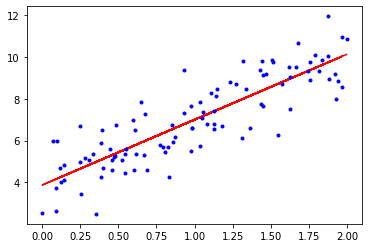

In [ ]:
plt.plot(X, y_predict, "r-")
plt.plot(X, y, "b.")

Scikit-Learn proporciona una clase útil para implementar y entrenar un modelo de regresión lineal: `LinearRegression`.

In [ ]:
# Crea objeto de regresión lineal
lin_reg = LinearRegression()

In [ ]:
# Ajusta modelo de regresión lineal
lin_reg.fit(X, y)

# Devuelve intercepto y coeficientes de modelo de regresión lineal
lin_reg.intercept_, lin_reg.coef_

(array([3.86405831]), array([[3.13727315]]))

## Regresión polinomial

¿Cómo ajustamos un modelo a datos que son en realidad más complejos que una simple línea recta Sorprendentemente, podemos usar un modelo lineal para ajustar datos no lineales. Una forma sencilla de hacer esto es agregar potencias de cada variable como variables nuevas y luego entrenar un modelo lineal en este conjunto ampliado de variables. Esta técnica se llama regresión polinomial.

In [ ]:
# Define variables independientes
m = 100
X = 6 * np.random.rand(m, 1) - 3

# Define variables dependientes (y = 0.5 * x_1^2 + x_i + 2 + ruído gauseano)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

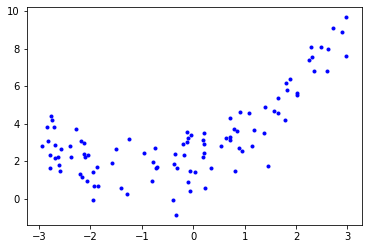

In [ ]:
# Grafica X y y
plt.plot(X, y, "b.")

Para transformar nuestros datos de entrenamiento, agregando el cuadrado (polinomio de segundo grado) de cada variable, podemos utilizar la clase `PolynomialFeatures`. 

In [ ]:
# Crea objeto para transformar
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transforma conjunto de datos con el objeto para transformar
X_poly = poly_features.fit_transform(X)

# Imprime comparativa entre dato original y dato tranformado
print(X[0])
print(X_poly[0])

[-2.846235]
[-2.846235    8.10105365]


`X_poly` ahora contiene la variable original de $X$ y el cuadrado de esta misma. Ahora, es posible ajustar un modelo de regresión lineal a estos datos de entrenamiento extendidos. 

In [ ]:
# Crea objeto de regresión lineal
lin_reg = LinearRegression()

In [ ]:
# Ajusta modelo de regresión lineal
lin_reg.fit(X_poly, y)

# Devuelve intercepto y coeficientes de modelo de regresión linea
lin_reg.intercept_, lin_reg.coef_

(array([2.04811798]), array([[1.00585338, 0.4668074 ]]))

Debemos tener en cuenta que cuando hay múltiples variables, la regresión polinomial es capaz de encontrar relaciones entre todas ellas (que es algo que un modelo de regresión lineal simple no puede hacer). Esto es posible gracias al hecho de que `PolynomialFeatures` también agrega todas las combinaciones de variables hasta el grado dado. Por ejemplo, si hubiera dos variables $a$ y $b$, `PolynomialFeatures` con tre grados no solo agregaría $a^2$, $b^2$, $a^3$ y $b^3$, pero también las combinaciones $ab$, $a^2b$ y $ab^2$. 

## Regresión logística

**La regresión logística es un modelo de Machine Learning utilizado para predecir la probabilidad de ocurrencia de un evento, es decir, para problemas de clasificación.** La salida del modelo de regresión logística es un valor de probabilidad entre 0 y 1. La salida representa la probabilidad de que la clase de los datos de entrada sea 1.



**Los datos de entrada se asignan a una probabilidad utilizando la función sigmoide.** La función sigmoide, también llamada función logística. La función sigmoide es una función matemática que mapea los valores (suma de entrada ponderada) de -infinito a +infinito a valores entre 0 y 1. La función sigmoide se puede expresar con la siguiente ecuación:  

$\sigma(z)=\frac{1}{1+e^{-z}}$

El valor de $z$ en la función sigmoide representa la suma ponderada de los valores de entrada y se puede expresar con la siguiente ecuación: 

$z=\theta^{T}x$

Visualmente la función sigmoide se ve así:

<image src="https://www.geogebra.org/resource/BdrYBMfc/S6TIV3WZYqfo0tZx/material-BdrYBMfc.png">

La salida del modelo de regresión logística siempre está entre 0 y 1. Si la salida está cerca de 0, significa que es menos probable que ocurra el evento. Si la salida está cerca de 1, significa que es más probable que ocurra el evento. Por ejemplo, si el valor del modelo de regresión logística (representado mediante la función sigmoide) es 0.8, representa que la probabilidad de que ocurra el evento es 0.8 dado un conjunto particular de coeficientes aprendidos mediante la optimización de la función de costo. Para cualquier nuevo valor X, la salida de la función anterior se usará para hacer la predicción.

**Los coeficientes en la regresión logística se aprenden utilizando la estimación de máxima verosimilitud.**

La estimación de máxima verosimilitud es un método de maximización de probabilidad, lo que significa que **determina los parámetros que tienen más probabilidades de producir los datos observados.** Desde un punto de vista estadístico, la estimación de máxima verosimilitud establece la media y la varianza como parámetros para determinar los valores paramétricos específicos para un modelo dado. Este conjunto de parámetros se puede utilizar para predecir los datos necesarios en una distribución normal.

Consideramos un conjunto de datos de dominio público alojado en [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). Este conjunto de datos contiene aproximadamente 770 observaciones extraídas de una base de datos de pacientes (mujeres de 21 años) del National Institute of Diabetes and Digestive and Kidney Diseases. 

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("https://raw.githubusercontent.com/sarahiaguilar/fundamentos-cdd/main/datos/diabetes.csv", header = 0, names = col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Selecciona variables independientes y variable dependiente
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [ ]:
# Divide conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Crea objeto de regresión logística
log_reg = LogisticRegression()

In [ ]:
# Ajusta modelo de regresión logística
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predice valores de variable dependiente
y_predict = log_reg.predict(X_test)

In [ ]:
# Calcula matriz de confusión
cm = confusion_matrix(y_test, y_predict)
cm

[[79 20]
 [19 36]]


**La matriz de confusión es un resumen de los resultados de predicción en un problema de clasificación. El número de predicciones correctas e incorrectas se resume con los valores de conteo y se descomponen por cada categoría.**

La matriz de confusión muestra las formas en que el modelo de clasificación se equivoca cuando hace predicciones brindadndo información no solo sobre los errores que realiza el clasificador, sino que, lo que es más importante, **los tipos de errores que está cometiendo.**

Los tipos de errores en la predicción de variables con dos categorías son los siguientes: 

* **Verdadero positivo (VP)**

Interpretación: Predijo positivo y es cierto.

Ejemplo: Predijo que una gato está en la caja cuando en realidad lo está.

* **Verdadero negativo (VN)**

Interpretación: Predijo negativo y es cierto.

Ejemplo: Predijo que una gato no está en la caja cuando en realidad no lo está.

* **Falso positivo (FP) (Error tipo 1)**

Interpretación: Predijo positivo y es falso.

Ejemplo: Predijo que una gato está en la caja cuando en realidad no lo está.

* **Falso negativo (FN) (Error tipo 2)**

Interpretación: Predijo negativo y es falso.

Ejemplo: Predijo que una gato no está en la caja cuando en realidad lo está.


Text(0.5, 15.0, 'Categoría predicha')

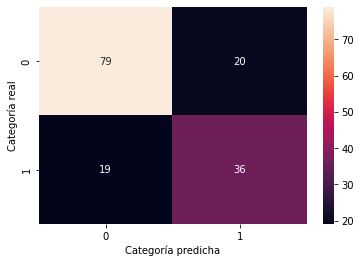

In [ ]:
# Grafica matriz de confusión 
fig, ax = plt.subplots()
tick_marks = np.arange(len(cats))
plt.xticks(tick_marks, cats)
plt.yticks(tick_marks, cats)
sns.heatmap(pd.DataFrame(cm), annot = True)
plt.ylabel("Categoría real")
plt.xlabel("Categoría predicha")

<image src="https://c.tenor.com/VtE0bemicwcAAAAC/cats-cats-in-boxes.gif">

Para los modelos de clasificación, existen 4 principales métricas de calidad del modelo.

* **Accuracy**

**El accuracy es la relación entre las observaciones correctamente clasificadas y todas las observaciones clasificadas.**

En el caso ejemplo, la presición respondería a la pregunta: ¿cuántos pacientes clasificamos correctamente?

$Escribir fórmula$

Numerador: Pacientes clasificados correctamente.

Denominador: Todos los pacientes clasificados.

* **Precisión**

**La precisión es la relación entre las observaciones correctamente clasificadas positivas y todas las observaciones clasificadas positivas.**

En el caso ejemplo, la presición respondería a la pregunta: ¿cuántos pacientes de los que clasificamos como diabéticos son realmente diabéticos?

$Escribir fórmula$

Numerador: Pacientes realmente diabéticos clasificados como diabéticos.

Denominador: Pacientes clasificados como diabéticos.

* **Recall**

**El recall es la relación entre las observaciones correctamente clasificadas positivas por nuestro modelo y todas las observaciones realmente positivas.**

En el caso ejemplo, la presición respondería a la pregunta: ¿a cuántos de los pacientes realmente diabéticos los clasificamos como diabéticos?

$Escribir fórmula$

Numerador: Pacientes realmente diabéticos clasificados como diabéticos.

Denominador: Pacientes realmente diabéticos.

* **F1-score**

**El F1-score es la media armónica de la precisión y el recall.**

$\frac{2*Precisión*Recall}{Precisión+Recall}$

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precisión:",precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1-score:", f1_score(y_test, y_predict))

Accuracy: 0.7467532467532467
Precisión: 0.6428571428571429
Recall: 0.6545454545454545
F1-score: 0.6486486486486486
